In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [112]:
# set_length = []
# set_feat_num = []

# for i in range(10):
#     df_check = pd.read_csv(f'data/Kickstarter00{i}.csv')
#     set_length.append(len(df_check))
#     set_feat_num.append(df_check.shape[1])


# for i in range(10, 56):
#     df_check = pd.read_csv(f'data/Kickstarter0{i}.csv')
#     set_length.append(len(df_check))
#     set_feat_num.append(df_check.shape[1])

# print(f"Observations in each dataset: {set_length}")
# print(f"Number of features in each dataset: {set_feat_num}")

In [189]:
frame_all = pd.read_csv('data/Kickstarter_full.csv', index_col=0)

In [190]:
frame_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168677 entries, 0 to 209220
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             168677 non-null  int64  
 1   blurb                     168677 non-null  object 
 2   converted_pledged_amount  168677 non-null  int64  
 3   country                   168677 non-null  object 
 4   created_at                168677 non-null  object 
 5   currency                  168677 non-null  object 
 6   currency_symbol           168677 non-null  object 
 7   currency_trailing_code    168677 non-null  bool   
 8   current_currency          168677 non-null  object 
 9   deadline                  168677 non-null  object 
 10  disable_communication     168677 non-null  bool   
 11  fx_rate                   168677 non-null  float64
 12  goal                      168677 non-null  float64
 13  id                        168677 non-null  i

In [194]:
frame_all_sorted = frame_all.sort_values('deadline', ascending=False).copy(deep=True)

In [199]:
frame_all_sorted.loc[44363]

backers_count                                                            4640
blurb                       The next evolution in showering: more heat, mo...
converted_pledged_amount                                              1926542
country                                                                    US
created_at                                                2018-06-22 19:02:43
currency                                                                  USD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                  2019-03-14 04:06:01
disable_communication                                                   False
fx_rate                                                                   1.0
goal                                                            

<AxesSubplot:xlabel='goal_usd', ylabel='state'>

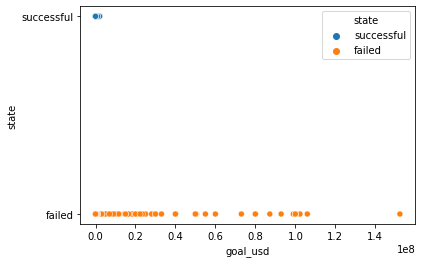

In [178]:
sns.scatterplot(x='goal_usd', y='state',hue='state', data=frame_all)

In [116]:
frame_all.static_usd_rate.describe()

count    168698.000000
mean          1.014544
std           0.225134
min           0.008771
25%           1.000000
50%           1.000000
75%           1.000000
max           1.716408
Name: static_usd_rate, dtype: float64

<AxesSubplot:xlabel='static_usd_rate', ylabel='Count'>

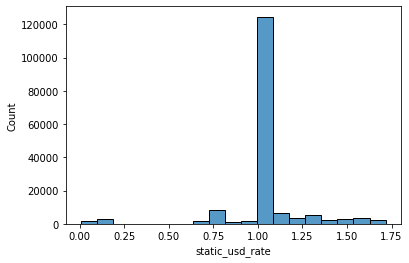

In [117]:
sns.histplot(frame_all['static_usd_rate'])

<AxesSubplot:xlabel='fx_rate', ylabel='Count'>

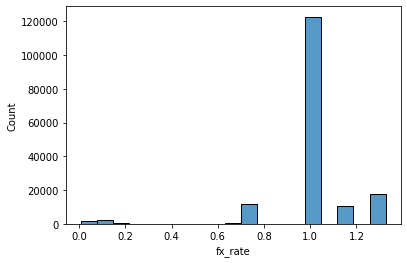

In [118]:
sns.histplot(frame_all['fx_rate'])

<AxesSubplot:xlabel='currency', ylabel='Count'>

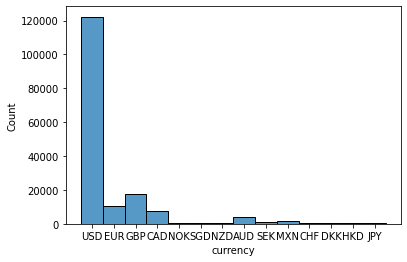

In [119]:
sns.histplot(frame_all['currency'])

In [120]:
frame_all.currency.value_counts()

USD    122267
GBP     17867
EUR     10638
CAD      7642
AUD      3833
MXN      1671
SEK      1073
NZD       738
DKK       711
HKD       656
CHF       511
SGD       469
NOK       396
JPY       226
Name: currency, dtype: int64

In [121]:
frame_all.current_currency.value_counts()

USD    168698
Name: current_currency, dtype: int64

In [122]:
frame_all.head()

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,...,goal_surpass,goal_surpass_share,goal_surpass_usd,goal_usd,blurb_words,blurb_len,name_len,name_words,state_bool,baseline
0,21,2006 was almost 7 years ago.... Can you believ...,802,US,2013-12-21 21:01:30,USD,$,True,USD,2014-02-08 22:37:26,...,602.0,3.010000,602.000000,200.0000,26.0,134.0,21,4,1,1
1,97,An adorable fantasy enamel pin series of princ...,2259,US,2019-02-08 21:02:48,USD,$,True,USD,2019-03-05 16:00:11,...,1859.0,4.647500,1859.000000,400.0000,9.0,55.0,31,5,1,1
2,88,Helping a community come together to set the s...,29638,US,2016-10-23 17:06:24,USD,$,True,USD,2016-12-01 15:58:50,...,2414.0,0.088672,2414.000000,27224.0000,25.0,135.0,60,9,1,0
3,193,Every revolution starts from the bottom and we...,49158,IT,2018-10-24 08:32:00,EUR,€,False,USD,2018-12-08 22:59:00,...,3180.0,0.079500,3614.149723,45461.0028,13.0,75.0,25,5,1,1
4,20,Learn to build 10+ Applications in this comple...,549,US,2015-03-07 05:35:17,USD,$,True,USD,2015-04-08 16:36:57,...,-451.0,-0.451000,-451.000000,1000.0000,22.0,133.0,30,4,0,0


<AxesSubplot:xlabel='state', ylabel='count'>

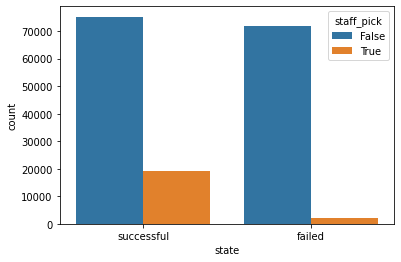

In [123]:
sns.countplot('state', data=frame_all, hue='staff_pick')

<AxesSubplot:xlabel='state', ylabel='count'>

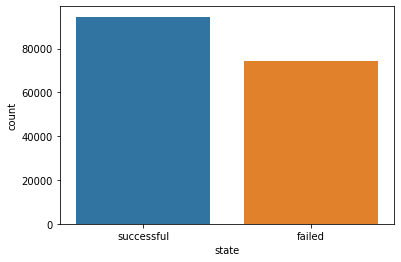

In [124]:
sns.countplot('state', data=frame_all)

<AxesSubplot:xlabel='state', ylabel='count'>

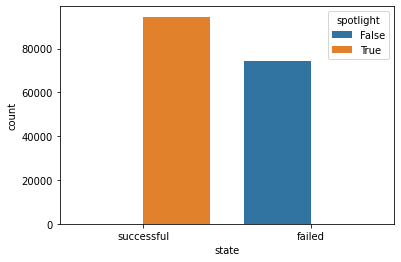

In [125]:
sns.countplot('state', data=frame_all, hue='spotlight')

<AxesSubplot:xlabel='converted_pledged_amount', ylabel='usd_pledged'>

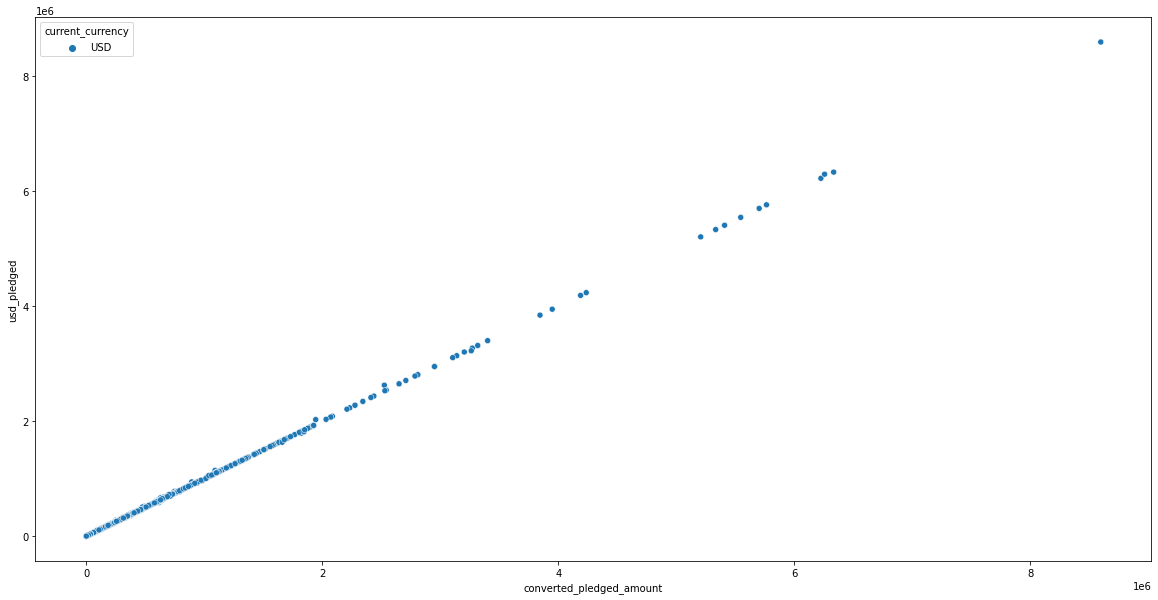

In [126]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot('converted_pledged_amount', 'usd_pledged', hue='current_currency', data=frame_all)

# RESULT: 'converted_pledged_amount' and 'usd_pledged'seem to deliver in most cases the same numbers.

<AxesSubplot:xlabel='pledged', ylabel='usd_pledged'>

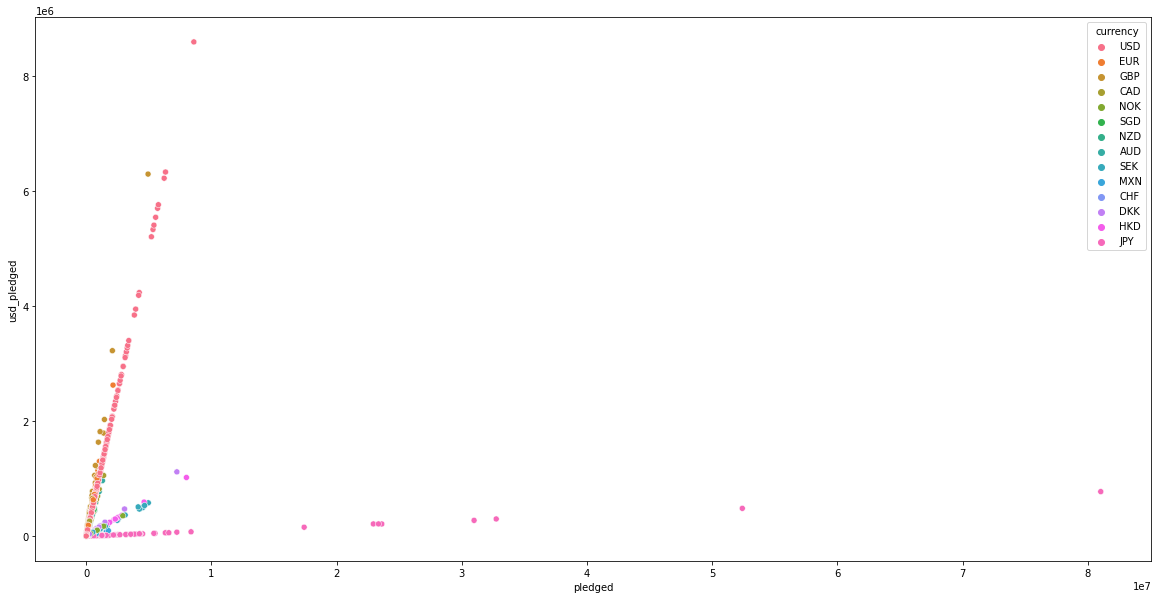

In [127]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot('pledged', 'usd_pledged', hue='currency', data=frame_all)

# RESULT: 'pledged' and 'usd_pledged'do not deliver the same absolute numbers, since sometimes different currencies are shown.
# See for example the observation on the bottom right, which seems to be a campaign in JPN YEN, which is much smaller in USD.
# NOT use 'pledged' in model
# Use 'pledged' only for comparing with 'goal'variable in order to calculate surpass or not surpassed goals.

In [191]:
frame_all.iloc[frame_all['pledged'].idxmax()] 

backers_count                                                             357
blurb                       We are building a professional coffee mill in ...
converted_pledged_amount                                               145720
country                                                                    NZ
created_at                                                2016-11-04 21:43:52
currency                                                                  NZD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                  2016-12-31 00:00:00
disable_communication                                                   False
fx_rate                                                              0.684442
goal                                                            

<AxesSubplot:xlabel='goal_usd', ylabel='usd_pledged'>

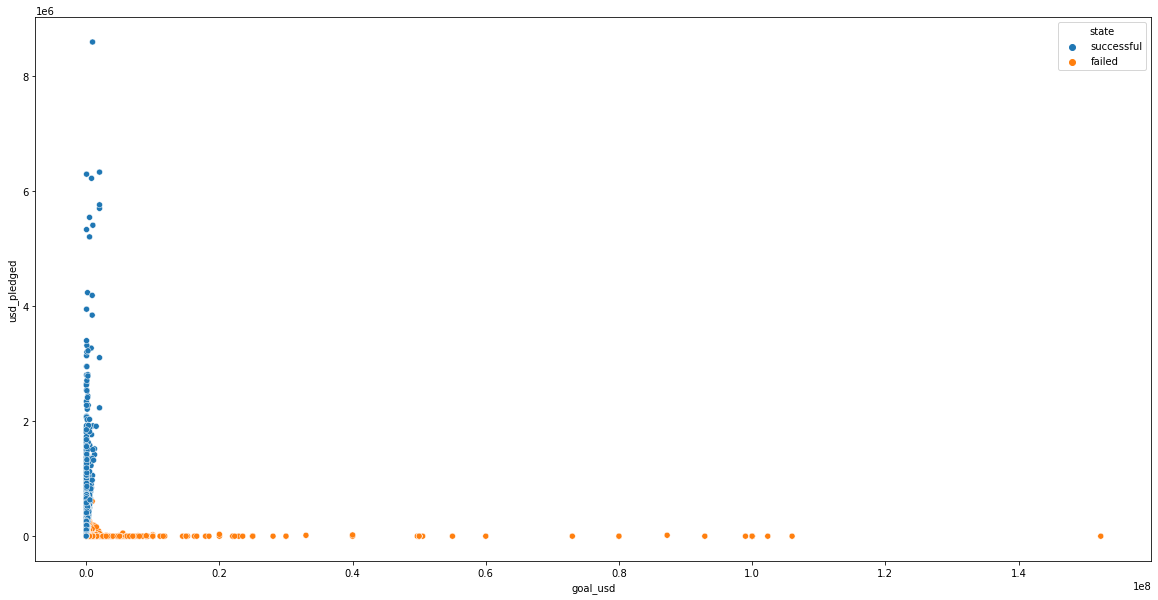

In [179]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot('goal_usd', 'usd_pledged', hue='state', data=frame_all)

In [130]:
frame_all.groupby('state').mean()

,backers_count,converted_pledged_amount,currency_trailing_code,disable_communication,fx_rate,goal,id,is_starrable,pledged,spotlight,...,goal_surpass,goal_surpass_share,goal_surpass_usd,goal_usd,blurb_words,blurb_len,name_len,name_words,state_bool,baseline
state,,,,,,,,,,,,,,,,,,,,,
failed,12.311659,1093.026359,0.811140,0.0,0.991108,93559.720535,1.072412e+09,0.0,1619.362907,0.0,...,-91940.357628,-0.920050,-80548.314729,81642.814083,19.125848,112.884714,32.625369,5.269341,0.0,0.598942
successful,240.337140,20743.456587,0.838827,0.0,1.000928,12960.477943,1.073433e+09,0.0,28306.564273,1.0,...,15346.086330,7.340443,11500.767314,9259.999542,18.915279,112.814781,36.486671,6.049763,1.0,0.829574


In [131]:
# # Calculate amount of surpass or not surpass (pledged - goal)
# frame_all['goal_surpass'] = frame_all['pledged'] - frame_all['goal']
# # Calculate share of surpassing or not surpassing
# frame_all['goal_surpass_share'] = frame_all['goal_surpass'] / frame_all['goal']
# # Convert goal_surpass into USD
# frame_all['goal_surpass_usd'] = frame_all['goal_surpass'] * frame_all['static_usd_rate']
# # Convert goal into USD
# frame_all['goal_usd'] = frame_all['goal'] * frame_all['static_usd_rate']

# # JUST FOR DOUBLE CHECKING THE RESULTS:
# # Calculate amount of surpass or not surpass in USD for check (usd_pledged - goal_usd)
# frame_all['goal_surpass_usd_check'] = frame_all['usd_pledged'] - frame_all['goal_usd']
# # Calculate share of surpassing or not surpassing of the USD check
# frame_all['goal_surpass_share_usd'] = frame_all['goal_surpass_usd_check'] / frame_all['goal_usd']


In [132]:
# frame_all['error_share']= frame_all['goal_surpass_share_usd'] - frame_all['goal_surpass_share']
# frame_all['error_share'].abs().sum()

In [133]:
# print(frame_all.goal_surpass_share.describe())
# print(frame_all.goal_surpass_share_usd.describe())

#### RESULT: 'goal_surpass_share' and 'goal_surpass_usd' can be used since the "check-columns" provide the same results.
#### TAKE CARE: There are huge outliers in the share --> Max 68763 (project id: 1947298033)

In [188]:
i = frame_all.goal_surpass_share.argmax()
print(frame_all.iloc[i])

backers_count                                                             955
blurb                       The 3rd installment of the popular Covers with...
converted_pledged_amount                                                68764
country                                                                    US
created_at                                                2016-10-11 23:14:53
                                                  ...                        
currency_NOK                                                                0
currency_NZD                                                                0
currency_SEK                                                                0
currency_SGD                                                                0
currency_USD                                                                1
Name: 70691, Length: 82, dtype: object


In [135]:
goal_1 = frame_all.loc[frame_all['goal'] == 1]

# RESULT: There are 246+17 rows where the goal only was 1 (Currency). Valid observations?

In [136]:
goal_1.state.value_counts()

successful    246
failed         17
Name: state, dtype: int64

In [137]:
failed = frame_all.loc[frame_all['state'] == 'failed']
success = frame_all.loc[frame_all['state'] == 'successful']



In [138]:
failed

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,...,goal_surpass,goal_surpass_share,goal_surpass_usd,goal_usd,blurb_words,blurb_len,name_len,name_words,state_bool,baseline
4,20,Learn to build 10+ Applications in this comple...,549,US,2015-03-07 05:35:17,USD,$,True,USD,2015-04-08 16:36:57,...,-451.0,-0.451000,-451.000000,1000.000000,22.0,133.0,30,4,0,0
7,1,Let's build and remix a new Personal Web Theme...,30,US,2014-04-14 00:24:36,USD,$,True,USD,2014-11-22 18:22:00,...,-19970.0,-0.998500,-19970.000000,20000.000000,22.0,132.0,45,7,0,0
8,2,"A limited edition, signed and numbered hand sc...",70,US,2012-07-23 16:29:15,USD,$,True,USD,2012-10-06 16:37:30,...,-14430.0,-0.995172,-14430.000000,14500.000000,17.0,111.0,40,5,0,1
9,31,"Play this hilarious, nonsensical card game for...",1344,US,2016-06-06 17:26:56,USD,$,True,USD,2016-07-29 23:57:58,...,-8656.0,-0.865600,-8656.000000,10000.000000,9.0,65.0,7,1,0,1
14,0,OVERTHROW THE KING AND TAKE WHAT IS YOURS & Ki...,0,US,2016-04-26 08:56:26,USD,$,True,USD,2016-06-01 09:46:59,...,-5000.0,-1.000000,-5000.000000,5000.000000,20.0,107.0,35,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209210,5,Alison's a UK musician specialising in bollywo...,167,GB,2014-02-28 15:05:30,GBP,£,False,USD,2014-05-02 14:33:00,...,-401.0,-0.802000,-667.603418,832.423215,23.0,134.0,58,7,0,1
209213,0,The Liberal Studies Leader is a website for sh...,0,US,2017-03-17 15:46:49,USD,$,True,USD,2017-04-16 16:55:34,...,-2500.0,-1.000000,-2500.000000,2500.000000,18.0,122.0,26,4,0,1
209214,7,There are known website for providing free and...,135,US,2017-02-21 18:39:30,USD,$,True,USD,2017-03-23 17:42:00,...,-4865.0,-0.973000,-4865.000000,5000.000000,23.0,134.0,36,6,0,0
209218,11,Over 250 healthy recipes free from ANY added S...,305,AU,2015-12-22 03:01:05,AUD,$,True,USD,2016-01-25 09:15:09,...,-7565.0,-0.945625,-5504.103892,5820.598960,20.0,132.0,60,10,0,0


In [139]:
success.max()

# RESULT: Within the successful projects, max goal is 200.000 USD 

backers_count                                                          105857
blurb                       🚨 Limited-Time Offers 🚨 Early Access 🚨 World-C...
converted_pledged_amount                                              8596474
country                                                                    US
created_at                                                2019-03-04 04:34:18
currency                                                                  USD
currency_symbol                                                             €
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                  2019-03-14 04:06:01
disable_communication                                                   False
fx_rate                                                               1.32568
goal                                                            

In [140]:
failed_0 = failed.loc[failed['goal_surpass'] > 0]

# RESULT: 3 observations surpassed the goal but nevertheless failed --> Shall be removed??


In [141]:
failed_0

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,...,goal_surpass,goal_surpass_share,goal_surpass_usd,goal_usd,blurb_words,blurb_len,name_len,name_words,state_bool,baseline
40082,141,"A variety of textures, and grooves from heavy...",23020,US,2013-01-15 13:47:00,USD,$,True,USD,2013-04-04 08:55:56,...,20.01,0.00087,20.01,23000.0,18.0,114.0,9,1,0,1
60727,5,A must have in your outdoor survivalist backpa...,1551,US,2018-07-27 03:03:12,USD,$,True,USD,2018-08-19 19:26:51,...,1051.00,2.10200,1051.00,500.0,15.0,93.0,28,5,0,0
149883,86,qFoods is the app that helps you make healthie...,25022,US,2016-10-27 17:12:58,USD,$,True,USD,2018-05-21 19:12:52,...,22.00,0.00088,22.00,25000.0,24.0,135.0,58,10,0,0


<AxesSubplot:xlabel='goal_usd', ylabel='goal_surpass_usd'>

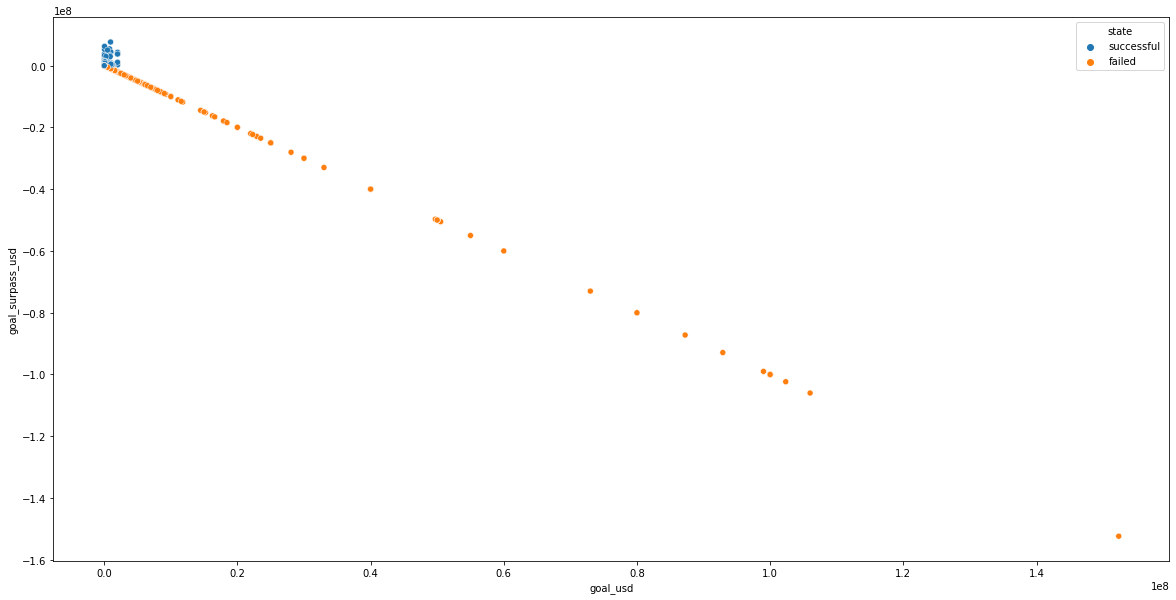

In [142]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot(x='goal_usd', y='goal_surpass_usd', data=frame_all, hue='state')
# RESULT: The higher the goal the more projects have failed.

<AxesSubplot:xlabel='goal_usd', ylabel='state'>

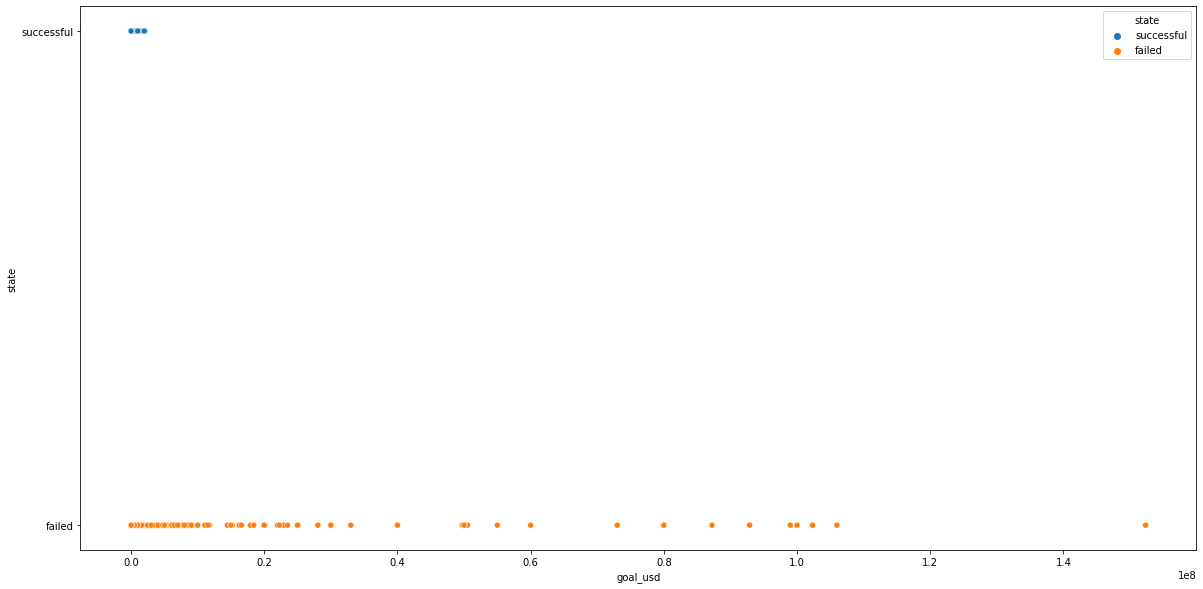

In [143]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot(x='goal_usd', y='state', data=frame_all, hue='state')
# RESULT: The higher the goal the more projects have failed.

In [144]:
i=frame_all.goal_usd.argmax()
print(frame_all.iloc[i])

backers_count                                                               0
blurb                       A 2000 year old "Romeo & Juliet" love story, s...
converted_pledged_amount                                                    0
country                                                                    GB
created_at                                                2015-10-29 22:01:46
currency                                                                  GBP
currency_symbol                                                             £
currency_trailing_code                                                  False
current_currency                                                          USD
deadline                                                  2015-11-30 22:01:00
disable_communication                                                   False
fx_rate                                                               1.32568
goal                                                            

In [145]:
# # Calculate number of words in blurb
# frame_all['blurb_words'] = frame_all['blurb'].str.split().str.len()
# # Calculate number of characters in blurb
# frame_all['blurb_len'] = frame_all['blurb'].str.len()
# # Calculate number of characters in name
# frame_all['name_len'] = frame_all['name'].str.len()
# # Calculate number of words in name
# frame_all['name_words'] = frame_all['name'].str.split().str.len()

In [149]:
frame_all = frame_all.drop((frame_all.query('state == "failed" and goal_surpass_usd >= 0')), axis=0)


KeyError: "['backers_count' 'blurb' 'converted_pledged_amount' 'country' 'created_at'\n 'currency' 'currency_symbol' 'currency_trailing_code' 'current_currency'\n 'deadline' 'disable_communication' 'fx_rate' 'goal' 'id' 'is_starrable'\n 'launched_at' 'name' 'pledged' 'slug' 'source_url' 'spotlight'\n 'staff_pick' 'state' 'state_changed_at' 'static_usd_rate' 'usd_pledged'\n 'usd_type' 'dur_inactive' 'dur_until_state_changed' 'dur_active'\n 'dur_ratio' 'cat_name' 'cat_slug' 'loc_name' 'loc_country' 'loc_state'\n 'loc_type' 'photo_thumb' 'photo_large' 'project_address' 'profile_photo'\n 'creator_name' 'creator_id' 'creator_thumb' 'creator_address'\n 'main_category' 'sub_category' 'goal_surpass' 'goal_surpass_share'\n 'goal_surpass_usd' 'goal_usd' 'blurb_words' 'blurb_len' 'name_len'\n 'name_words' 'state_bool' 'baseline'] not found in axis"

In [147]:
frame_all.query('state == "failed" and goal_surpass_usd >= 0')

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,...,goal_surpass,goal_surpass_share,goal_surpass_usd,goal_usd,blurb_words,blurb_len,name_len,name_words,state_bool,baseline
40082,141,"A variety of textures, and grooves from heavy...",23020,US,2013-01-15 13:47:00,USD,$,True,USD,2013-04-04 08:55:56,...,20.01,0.00087,20.01,23000.0,18.0,114.0,9,1,0,1
60727,5,A must have in your outdoor survivalist backpa...,1551,US,2018-07-27 03:03:12,USD,$,True,USD,2018-08-19 19:26:51,...,1051.00,2.10200,1051.00,500.0,15.0,93.0,28,5,0,0
149883,86,qFoods is the app that helps you make healthie...,25022,US,2016-10-27 17:12:58,USD,$,True,USD,2018-05-21 19:12:52,...,22.00,0.00088,22.00,25000.0,24.0,135.0,58,10,0,0


In [152]:
# Drop all rows, which failed but surpassed the goal (state = 'failed' but goal_surpass_usd >= 0)
index_names = frame_all[(frame_all['state'] == 'failed' ) & (frame_all['goal_surpass_usd'] >= 0)].index
frame_all= frame_all.drop(index_names)


In [153]:
frame_all.query('state == "failed" and goal_surpass_usd >= 0')


,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,...,goal_surpass,goal_surpass_share,goal_surpass_usd,goal_usd,blurb_words,blurb_len,name_len,name_words,state_bool,baseline


In [154]:
frame_all

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,...,goal_surpass,goal_surpass_share,goal_surpass_usd,goal_usd,blurb_words,blurb_len,name_len,name_words,state_bool,baseline
0,21,2006 was almost 7 years ago.... Can you believ...,802,US,2013-12-21 21:01:30,USD,$,True,USD,2014-02-08 22:37:26,...,602.0,3.010000,602.000000,200.00000,26.0,134.0,21,4,1,1
1,97,An adorable fantasy enamel pin series of princ...,2259,US,2019-02-08 21:02:48,USD,$,True,USD,2019-03-05 16:00:11,...,1859.0,4.647500,1859.000000,400.00000,9.0,55.0,31,5,1,1
2,88,Helping a community come together to set the s...,29638,US,2016-10-23 17:06:24,USD,$,True,USD,2016-12-01 15:58:50,...,2414.0,0.088672,2414.000000,27224.00000,25.0,135.0,60,9,1,0
3,193,Every revolution starts from the bottom and we...,49158,IT,2018-10-24 08:32:00,EUR,€,False,USD,2018-12-08 22:59:00,...,3180.0,0.079500,3614.149723,45461.00280,13.0,75.0,25,5,1,1
4,20,Learn to build 10+ Applications in this comple...,549,US,2015-03-07 05:35:17,USD,$,True,USD,2015-04-08 16:36:57,...,-451.0,-0.451000,-451.000000,1000.00000,22.0,133.0,30,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209214,7,There are known website for providing free and...,135,US,2017-02-21 18:39:30,USD,$,True,USD,2017-03-23 17:42:00,...,-4865.0,-0.973000,-4865.000000,5000.00000,23.0,134.0,36,6,0,0
209215,215,The first book in an inspirational series for ...,18608,US,2013-06-03 17:49:35,USD,$,True,USD,2013-08-11 11:46:39,...,1122.0,0.064166,1122.000000,17486.00000,24.0,134.0,19,3,1,1
209218,11,Over 250 healthy recipes free from ANY added S...,305,AU,2015-12-22 03:01:05,AUD,$,True,USD,2016-01-25 09:15:09,...,-7565.0,-0.945625,-5504.103892,5820.59896,20.0,132.0,60,10,0,0
209219,0,"Give your baby style and flair with ""Gorgeous ...",0,US,2016-08-12 08:48:02,USD,$,True,USD,2016-09-25 21:09:13,...,-8000.0,-1.000000,-8000.000000,8000.00000,12.0,82.0,36,4,0,1


In [172]:
#categorical data
# categorical_cols = ['main_category'] 

# frame_all['currency'] = frame_all.currency.astype('category')
# Save category-column-names in list
categorical_cols = frame_all.select_dtypes(include='category').columns

#import pandas as pd
frame_all = pd.get_dummies(frame_all, columns = categorical_cols, drop_first=True)

In [173]:
frame_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168695 entries, 0 to 209220
Data columns (total 82 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   backers_count               168695 non-null  int64  
 1   blurb                       168695 non-null  object 
 2   converted_pledged_amount    168695 non-null  int64  
 3   country                     168695 non-null  object 
 4   created_at                  168695 non-null  object 
 5   currency_symbol             168695 non-null  object 
 6   currency_trailing_code      168695 non-null  bool   
 7   current_currency            168695 non-null  object 
 8   deadline                    168695 non-null  object 
 9   disable_communication       168695 non-null  bool   
 10  fx_rate                     168695 non-null  float64
 11  goal                        168695 non-null  float64
 12  id                          168695 non-null  int64  
 13  is_starrable  

In [170]:
frame_all['currency'] = frame_all.currency.astype('category')

categorical_cols2 = frame_all.select_dtypes(include='category').columns

In [171]:
categorical_cols2

Index(['currency'], dtype='object')

In [168]:
categorical_cols3 = frame_all.select_dtypes(include='object').columns

In [169]:
categorical_cols3

Index(['blurb', 'country', 'created_at', 'currency', 'currency_symbol',
       'current_currency', 'deadline', 'launched_at', 'name', 'slug',
       'source_url', 'state', 'state_changed_at', 'usd_type', 'cat_name',
       'cat_slug', 'loc_name', 'loc_country', 'loc_state', 'loc_type',
       'photo_thumb', 'photo_large', 'project_address', 'profile_photo',
       'creator_name', 'creator_thumb', 'creator_address', 'sub_category'],
      dtype='object')

In [175]:
frame_all.is_starrable.unique()

array([False])

In [177]:
frame_all.disable_communication.value_counts()

False    168695
Name: disable_communication, dtype: int64

In [201]:
frame_all.blurb.to_csv('data/words.csv')